# <center><font size="7"><font color=Black>Financial inclusion in Africa </font></center>

## <a id='1'> <font size="6"><center><font color="INDIANRED">Modélisation</font>


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#pour equilibrer les données
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px # Pour faire des graph3D animés
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graph3D
from sklearn.metrics import classification_report
import pickle

## <a id='1'> <font size="6"><center><font color="INDIANRED">Importer les données</font>

In [2]:
train_data = pd.read_csv('./train_data.csv')
train_data.head()

,Unnamed: 0,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,0,2018,uniqueid_1,1,0,1,3,24,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,2018,uniqueid_2,0,0,0,5,70,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2,2018,uniqueid_3,1,1,1,5,26,1,0,...,0,0,0,0,0,1,1,0,0,0
3,3,2018,uniqueid_4,0,0,1,5,34,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,2018,uniqueid_5,0,1,0,8,26,1,1,...,0,1,0,0,0,0,1,0,0,0


<font color="Red">L'index est devenu colonne, il est donc nécessaire de le repasser en index

In [3]:
train_data.drop(columns={"Unnamed: 0"}, axis=1, inplace=True)
train_data.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,1,0,1,3,24,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,0,0,0,5,70,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,1,1,1,5,26,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,0,0,1,5,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,0,1,0,8,26,1,1,0,...,0,1,0,0,0,0,1,0,0,0


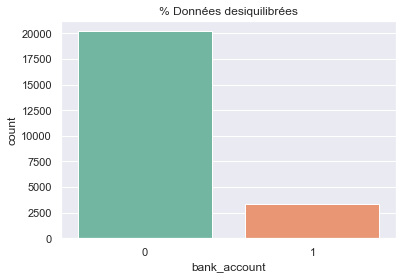

In [4]:
sns.countplot(train_data['bank_account'] ,palette = "Set2")
plt.title("% Données desiquilibrées");

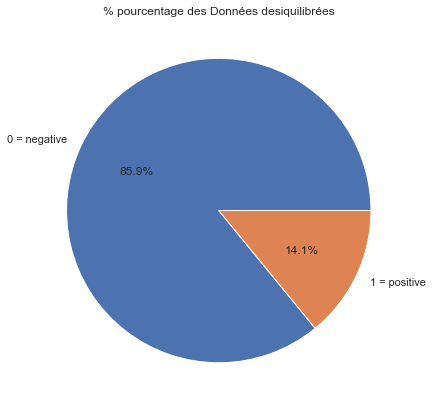

In [5]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(train_data.bank_account.value_counts(), labels = ["0 = negative","1 = positive"], autopct='%1.1f%%' ) 
plt.title("% pourcentage des Données desiquilibrées");

<font color="Red">85.9 % Negative (des personnes qui n'ont pas d'acces a un compte bancaire )
<br>14.1% Positive (les personnes qui ont acces a un compte bancaire )
    <br>Dataset Non equilibré 

In [6]:
#Separer les Features et les targets 
#Drop year , country , uniqueid (ça ne caracterise pas le cas étudié ) 
X= train_data.drop(['bank_account','uniqueid','year'], axis=1)
y=train_data['bank_account']

## <a id='2'> <font size="4"><font color="black"> Séparation des données non équilibrés </font>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0)

## <a id='2'> <font size="4"><font color="black"> Logistic Regression </font>

In [8]:
lr=LogisticRegression(max_iter = 100000)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
print(classification_report( y_test ,prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4005
           1       0.69      0.35      0.47       700

    accuracy                           0.88      4705
   macro avg       0.79      0.66      0.70      4705
weighted avg       0.87      0.88      0.86      4705



## <a id='2'> <font size="4"><font color="black"> XGBOOST </font>

In [10]:
XG=XGBClassifier()
XG.fit(X_train , y_train)
XGprediction=XG.predict(X_test)
XGprediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
print(classification_report( y_test ,XGprediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4005
           1       0.67      0.40      0.50       700

    accuracy                           0.88      4705
   macro avg       0.79      0.68      0.72      4705
weighted avg       0.87      0.88      0.87      4705



## <a id='2'> <font size="4"><font color="black"> Random Forest </font>

In [12]:
RF = RandomForestClassifier()
RF.fit(X_train , y_train)
RFprediction=RF.predict(X_test)
RFprediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
print(classification_report( y_test ,RFprediction))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4005
           1       0.56      0.41      0.48       700

    accuracy                           0.86      4705
   macro avg       0.73      0.68      0.70      4705
weighted avg       0.85      0.86      0.86      4705



Conclusion : sans equilibrer les données on a une accuracy score de :
- 0.88 avec la logistic regression
-  0.88 avec le XGboost
- 0.86 avec le RandomForest

on constate que la précision globale est assez élevé  0.86 
et lorsqu'on rentre dans le détail on se rend compte que le rappel et que le f1 score sont assez faibles. 
Cette première étude nous a permis de comprendre le comportement des modèles.
Nous allons désormais essayéé d'améliorer nos prédictions.

D'où notre rééquilibrage de nos données 


## <a id='1'> <font size="6"><center><font color="INDIANRED">Equilibrer Les données</font>

<br>Pour équilibrer nos données, on peut utiliser 3 methodes :
- RandomOverSampling (création de données manquantes)
- RandomUnderSampling (suppression de données surnuméraires)
- Smote (création de données manquantes)

# <center><font size="5"><font color=Black>Over Sampling </font></center>

1    20212
0    20212
Name: bank_account, dtype: int64


<AxesSubplot:xlabel='bank_account', ylabel='count'>

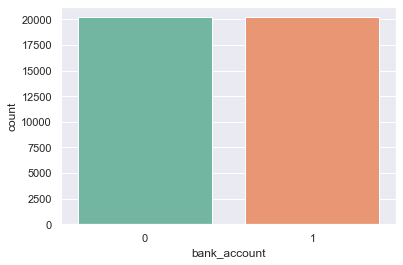

In [14]:
ovr = RandomOverSampler()
X_ovr, y_ovr = ovr.fit_sample(X, y)
print(y_ovr.value_counts())
sns.countplot(y_ovr ,palette = "Set2")

## <a id='2'> <font size="4"><font color="black"> Split des données  équilibrés avec Oversampling </font>


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_ovr, y_ovr, train_size=0.8)

## <a id='2'> <font size="4"><font color="black"> Logistic Regression </font>


In [16]:
lr_ovr=LogisticRegression(max_iter = 100000)
lr_ovr.fit(X_train,y_train)
prediction_ovr = lr_ovr.predict(X_test)
prediction_ovr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [17]:
print(classification_report( y_test ,prediction_ovr))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      4011
           1       0.80      0.75      0.77      4074

    accuracy                           0.78      8085
   macro avg       0.78      0.78      0.78      8085
weighted avg       0.78      0.78      0.78      8085



## <a id='2'> <font size="4"><font color="black"> XGBOOST </font>


In [18]:
XG_ovr=XGBClassifier()
XG_ovr.fit(X_train , y_train)
XGprediction_ovr=XG_ovr.predict(X_test)
XGprediction_ovr

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [19]:
print(classification_report( y_test ,XGprediction_ovr))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4011
           1       0.84      0.88      0.86      4074

    accuracy                           0.86      8085
   macro avg       0.86      0.86      0.86      8085
weighted avg       0.86      0.86      0.86      8085



## <a id='2'> <font size="4"><font color="black"> Random Forest </font>


In [20]:
RF_ovr = RandomForestClassifier()
RF_ovr.fit(X_train , y_train)
RFprediction_ovr=RF.predict(X_test)
RFprediction_ovr

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
print(classification_report( y_test ,RFprediction_ovr))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4011
           1       0.98      0.80      0.88      4074

    accuracy                           0.89      8085
   macro avg       0.91      0.89      0.89      8085
weighted avg       0.91      0.89      0.89      8085



Conclusion : avec L'oversampling on a eu une accuracy :
- 0.76 avec la logistic regression
- 0.84 avec le XGboost
- 0.89 avec le RandomForest


Nous avons de meilleurs résultats avec le modèle RandomForestClassifier

# <center><font size="5"><font color=Black>Under Sampling </font></center>

1    3312
0    3312
Name: bank_account, dtype: int64


<AxesSubplot:xlabel='bank_account', ylabel='count'>

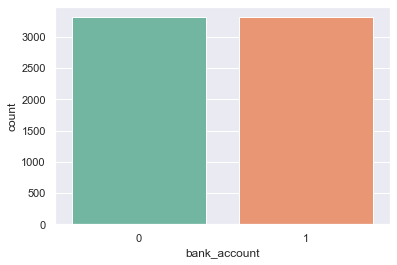

In [22]:
udr = RandomUnderSampler()
X_udr, y_udr = udr.fit_sample(X, y)
print(y_udr.value_counts())
sns.countplot(y_udr ,palette = "Set2")

## <a id='2'> <font size="4"><font color="black"> Split des données  équilibrés avec Undersampling </font>


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_udr, y_udr, train_size=0.8)

## <a id='2'> <font size="4"><font color="black"> Logistic Regression </font>


In [24]:
lr_udr=LogisticRegression(max_iter = 100000)
lr_udr.fit(X_train,y_train)
prediction_udr = lr_udr.predict(X_test)
prediction_udr

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
print(classification_report( y_test ,prediction_udr))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       668
           1       0.79      0.74      0.76       657

    accuracy                           0.77      1325
   macro avg       0.77      0.77      0.77      1325
weighted avg       0.77      0.77      0.77      1325



## <a id='2'> <font size="4"><font color="black"> XGBOOST </font>


In [26]:
XG_udr=XGBClassifier()
XG_udr.fit(X_train , y_train)
XGprediction_udr=XG_udr.predict(X_test)
XGprediction_udr

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print(classification_report( y_test ,XGprediction_udr))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       668
           1       0.76      0.74      0.75       657

    accuracy                           0.76      1325
   macro avg       0.76      0.76      0.76      1325
weighted avg       0.76      0.76      0.76      1325



## <a id='2'> <font size="4"><font color="black"> Random Forest </font>


In [28]:
RF_udr = RandomForestClassifier()
RF_udr.fit(X_train , y_train)
RFprediction_udr=RF_udr.predict(X_test)
RFprediction_udr

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
print(classification_report( y_test ,RFprediction_udr))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       668
           1       0.74      0.73      0.74       657

    accuracy                           0.74      1325
   macro avg       0.74      0.74      0.74      1325
weighted avg       0.74      0.74      0.74      1325



Conclusion : avec L'undersampling on a eu une accuracy :
- 0.75 avec la logistic regression
- 0.77  avec le XGboost
- 0.75 avec le RandomForest

Notre précision globale a diminué en revanche,
Nous avons le rappel  et f1 score qui ont augmenté

# <center><font size="5"><font color=Black>Smote </font></center>

1    20212
0    20212
Name: bank_account, dtype: int64


<AxesSubplot:xlabel='bank_account', ylabel='count'>

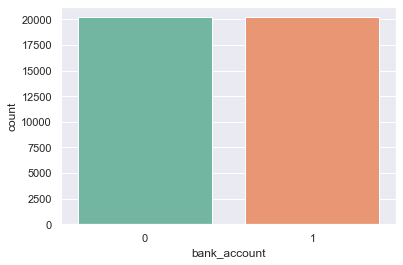

In [30]:
smote = SMOTE()
X_smote, y_smote = smote.fit_sample(X, y)
print(y_smote.value_counts())
sns.countplot(y_smote ,palette = "Set2")

## <a id='2'> <font size="4"><font color="black"> Split des données  équilibrés avec Smote </font>


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.8)

## <a id='2'> <font size="4"><font color="black"> Logistic Regression </font>


In [32]:
lr_smote=LogisticRegression(max_iter = 100000)
lr_smote.fit(X_train,y_train)
prediction_smote = lr_smote.predict(X_test)
prediction_smote

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
print(classification_report( y_test ,prediction_smote))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4051
           1       0.93      0.83      0.88      4034

    accuracy                           0.88      8085
   macro avg       0.89      0.88      0.88      8085
weighted avg       0.89      0.88      0.88      8085



## <a id='2'> <font size="4"><font color="black"> XGBOOST </font>


In [34]:
XG_smote=XGBClassifier()
XG_smote.fit(X_train , y_train)
XGprediction_smote=XG_smote.predict(X_test)
XGprediction_smote

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
print(classification_report( y_test ,XGprediction_smote))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4051
           1       0.92      0.88      0.90      4034

    accuracy                           0.90      8085
   macro avg       0.90      0.90      0.90      8085
weighted avg       0.90      0.90      0.90      8085



## <a id='2'> <font size="4"><font color="black"> Random Forest </font>


In [40]:
RF_smote = RandomForestClassifier()
RANDOMSMOTE=RF_smote.fit(X_train , y_train)
RFprediction_smote=RF_smote.predict(X_test)
RFprediction_smote
rf = RFprediction_smote


In [41]:
print(classification_report( y_test ,RFprediction_smote))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4051
           1       0.91      0.92      0.91      4034

    accuracy                           0.91      8085
   macro avg       0.91      0.91      0.91      8085
weighted avg       0.91      0.91      0.91      8085



Conclusion : avec L'ovesampling on a eu une accuracy :
- 0.88 avec la logistic regression
- 0.90  avec le XGboost
- 0.91 avec le RandomForest

<font color="Red">dans notre cas on regarde plutot l'accuracy ou le F1_Score parceque le but de ce projet n'est pas maximiser ou minimiser l'accuracy de l'une des categories (0 ou 1) 

<font color="Red">donc parmi les modèles qu'on a utilisé on trouve que le RandomForest avec Smote a l'accuracy la plus élevé 

Après avoir effectué un rééquilibrage de données de 3 façons différentes nous constatons à chaque fois ,
une amélioration de nos metrics F1_score, rappel, précision, malgré une diminution de la précision globale pour la plupart

Notre choix c'est porté sur le smote qui offre de meilleures performances en générale.
Les algorithmes sont plus ou moins égaux en terme de résultat, mais noous choisirons le modèle randomforest

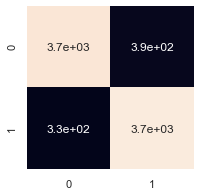

In [38]:
#le heatmap de l'algorithme choisit!!
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, RFprediction_smote), annot=True, cbar=False);

Nous obtenons les résultats suivants :
- En 0/0 les vrais négatifs
- En 0/1 les faux négatifs 
- En 1/0 les faux positifs 
- En 1/1 les  vrais positifs 

In [39]:
# déploiement du modèle
import pickle

Pkl_Filename = "finance.pkl"  

with open(Pkl_Filename, 'wb') as file:
 pickle.dump(RANDOMSMOTE, file)

In [43]:
import joblib
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [44]:
rf = joblib.load('model.pkl')

In [46]:
# Saving the data columns from training
model_columns = list(X_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
